#### __***LIME For Image***__

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.color import label2rgb
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import cv2

import warnings
warnings.filterwarnings('ignore')

#### __***Data Load Mnist Dataset***__

In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

#### __***Image Preprocessing***__

##### __***Size Normalization***__

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

##### __***Convertion to Categorial***__

In [4]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

#### __***CNN - Con2D->MaxPooling->Flatten->Dense->Softmax***__

In [5]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

#### __***Model Training***__

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8624 - loss: 0.4903 - val_accuracy: 0.9725 - val_loss: 0.1056
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9673 - loss: 0.1117 - val_accuracy: 0.9812 - val_loss: 0.0678
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9799 - loss: 0.0707 - val_accuracy: 0.9813 - val_loss: 0.0638
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9836 - loss: 0.0531 - val_accuracy: 0.9825 - val_loss: 0.0615
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9867 - loss: 0.0406 - val_accuracy: 0.9853 - val_loss: 0.0502
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9892 - loss: 0.0331 - val_accuracy: 0.9855 - val_loss: 0.0559
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9916 - loss: 0.0254 - val_accuracy: 0.9855 - val_loss: 0.0520
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9938 - loss: 0.0197 - val_accuracy: 0.

#### __***LIME Explainer***__

In [7]:
explainer = lime_image.LimeImageExplainer()

In [8]:
def explain_images(images):
    preds_fn = lambda x: model.predict(np.array([cv2.cvtColor(i, cv2.COLOR_RGB2GRAY) for i in x])[..., np.newaxis], verbose=0)
    results = []
    for img in images:
        exp = explainer.explain_instance(img.squeeze(), preds_fn, top_labels=1, hide_color=0, num_samples=100)
        temp, mask = exp.get_image_and_mask(exp.top_labels[0], positive_only=True, hide_rest=False)
        results.append(label2rgb(mask, temp, bg_label=0))
    return results

#### __***Method to Visualize***__

In [9]:
def show_explanations(originals, explanations):
    for i, (orig, exp) in enumerate(zip(originals, explanations)):
        fig, ax = plt.subplots(1, 2, figsize=(5, 2))
        ax[0].imshow(orig);
        ax[0].axis('off')
        ax[1].imshow(exp)
        ax[1].axis('off')
        plt.suptitle(f"LIME for label: {y_test[i]}", fontweight='bold', fontsize=12)
        plt.show()

#### __***Explanation for Test Images***__

In [10]:
lime_results = explain_images(x_test[:20])

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 186.59it/s]


#### __***Result***__

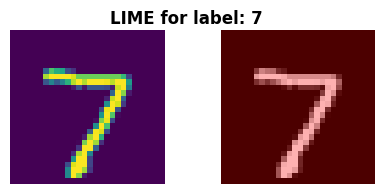

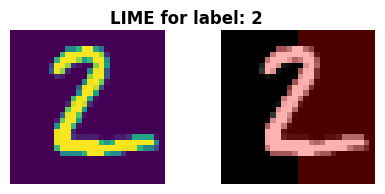

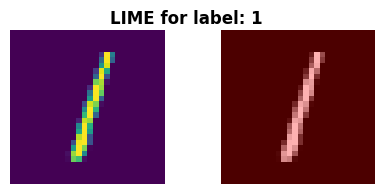

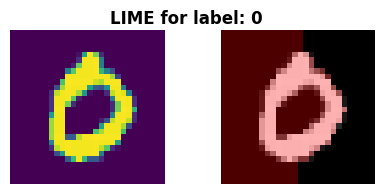

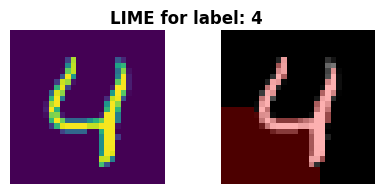

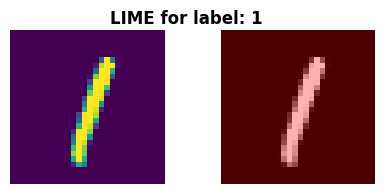

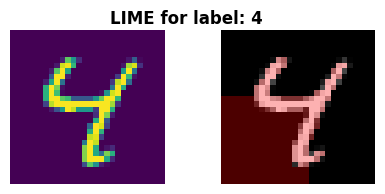

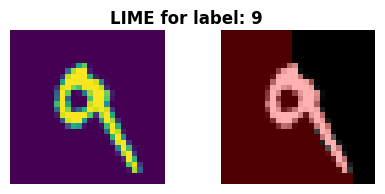

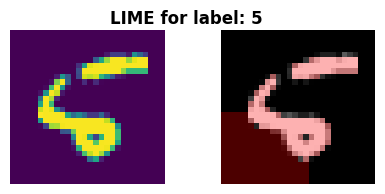

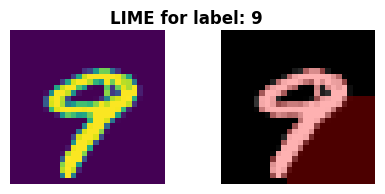

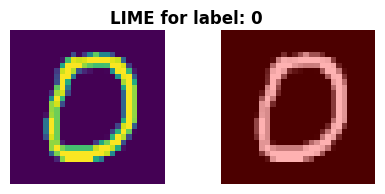

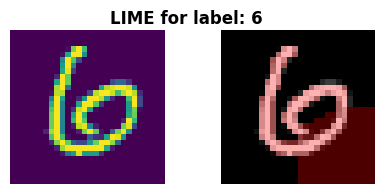

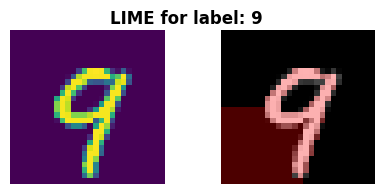

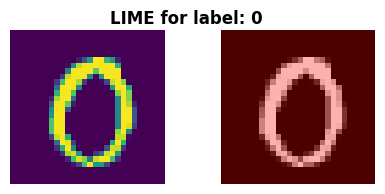

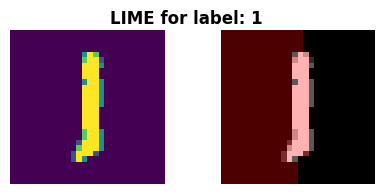

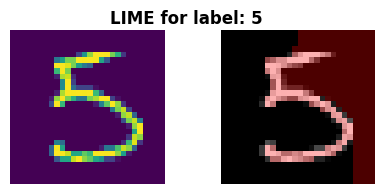

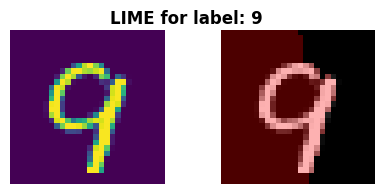

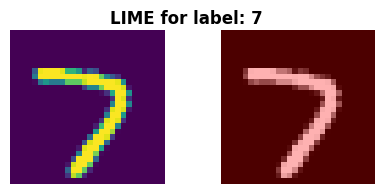

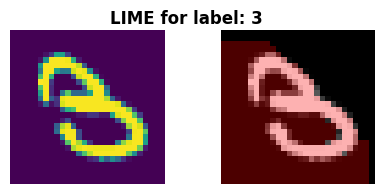

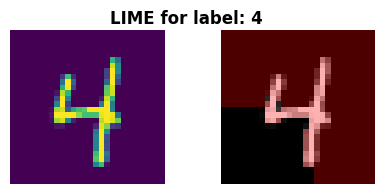

In [11]:
show_explanations(x_test[:20], lime_results)